<a href="https://colab.research.google.com/github/sigvehaug/Introduction-to-Python-for-Medical-Researchers/blob/master/08-Numpy-images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Python Programming for Medical Researchers, University of Bern, Sigve Haug

This notebook is a slightly revised version of G. Witz' course [Image Processing with Python](https://github.com/guiwitz/Python_image_processing).

# 8. Numpy with (Medical) Images

The Numpy documentation is [here](https://numpy.org/doc/stable/index.html#numpy-docs-mainpage).

---

All images are essentially matrices with a variable number of dimensions where each element represents the value of one pixel. The different dimensions and the pixel values can have very different meanings depending on the type of image considered, but the structure is the same.

Python does not allow by default to gracefully handle multi-dimensional data. In particular it is not desgined to handle matrix operations. Numpy was developed to fill in this blank and offers a very similar framework as the one offered by Matlab. It is underlying a large number of packages and has become abolsutely essential to Python scientific programming. In particular it underlies the functions of scikit-image. The latter in turn forms the basis of other software like CellProfiler. It is thus essential to have a good understanding of Numpy to  proceed.

Instead of introducing Numpy in an abstract way, we are going here to present it through the lense of image processing in order to focus on the most useful features in the context of this course.

## 8.1 Exploring an image

Some test images are provided directly in skimage, so let us look at one (we'll deal with the details of image import later). First let us import the necessary packages.

In [ ]:
import numpy as np
import skimage
import matplotlib.pyplot as plt

In [ ]:
# This would a standard example image in the skimage package
#image = skimage.data.coins()

We retrieve a skin lesion image from the github repository of the course.

In [ ]:
url = 'https://raw.githubusercontent.com/sigvehaug/Introduction-to-Python-for-Medical-Researchers/master/Data/ISIC_0000015.jpg'
image_color = skimage.io.imread(url)

In [ ]:
# What is the shape of the image ?
image_color.shape

(767, 1022, 3)

We see that this image has 767 rows, 1022 columns and 3 (RGB) channels. Let us now work on only one channel.

In [ ]:
image = image_color[...,0]
#image = skimage.color.rgb2gray(image_color) # Y = 0.2125 R + 0.7154 G + 0.0721 B

The first thing we can do is check the type of the image:

In [ ]:
type(image)

numpy.ndarray

We thus see that the imported image is indeed a Numpy array. We can also find out what is the type of each pixel:

In [ ]:
image.dtype

dtype('uint8')

We see here that the image is an 8bit image. Classical format we are going to see are 8bit (uint8), 16bit (uint16) and non-integers (usually float64). The type of the image pixels set what values they can take. For example 8bit means values from $0$ to $2^8 -1= 256-1 = 255$.

Since typing is dynamic in Python, if we for example divide our uint8 image by 2 it ends up being a float.

In [ ]:
image

array([[255, 239, 255, ..., 254, 240, 254],
       [234,  42,   9, ...,  77,  94, 235],
       [255,   0,   0, ...,  68,  76, 254],
       ...,
       [255,  25,   4, ...,  84,  84, 254],
       [229,  37,   0, ...,  93, 108, 244],
       [255, 240, 255, ..., 244, 230, 254]], dtype=uint8)

In [ ]:
image2 = image/2

In [ ]:
image2

array([[127.5, 119.5, 127.5, ..., 127. , 120. , 127. ],
       [117. ,  21. ,   4.5, ...,  38.5,  47. , 117.5],
       [127.5,   0. ,   0. , ...,  34. ,  38. , 127. ],
       ...,
       [127.5,  12.5,   2. , ...,  42. ,  42. , 127. ],
       [114.5,  18.5,   0. , ...,  46.5,  54. , 122. ],
       [127.5, 120. , 127.5, ..., 122. , 115. , 127. ]])

In [ ]:
image2.dtype

dtype('float64')

Let us check what are the image dimensions using the shape method:

In [ ]:
image.shape

(767, 1022)

We see that the image has 767 rows and 1022 columns. Let us have a look at it:

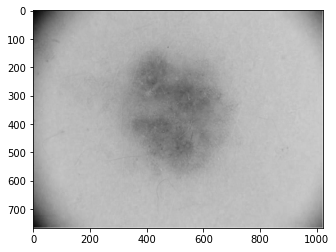

In [ ]:
plt.imshow(image, cmap = 'gray') # Colormap argument is ignored for RGB  data
plt.show()

Let us also look at the actual matrix behind that image:

In [ ]:
image

array([[255, 239, 255, ..., 254, 240, 254],
       [234,  42,   9, ...,  77,  94, 235],
       [255,   0,   0, ...,  68,  76, 254],
       ...,
       [255,  25,   4, ...,  84,  84, 254],
       [229,  37,   0, ...,  93, 108, 244],
       [255, 240, 255, ..., 244, 230, 254]], dtype=uint8)

Jupyter only shows us a part of this large matrix, adding ... between the first and last few rows/columns. Each value here corresponds to a single pixel of the image. The type of data contained in the array, here 8bit integer, is also displayed.

## 8.2 Operations on arrays

### 8.2.2 Arithmetic operations

Two types of simple arithmetic operations can be done on arrays. One can modify them using a scalar, for example by adding a constant:

In [ ]:
image

array([[255, 239, 255, ..., 254, 240, 254],
       [234,  42,   9, ...,  77,  94, 235],
       [255,   0,   0, ...,  68,  76, 254],
       ...,
       [255,  25,   4, ...,  84,  84, 254],
       [229,  37,   0, ...,  93, 108, 244],
       [255, 240, 255, ..., 244, 230, 254]], dtype=uint8)

In [ ]:
image+10

array([[  9, 249,   9, ...,   8, 250,   8],
       [244,  52,  19, ...,  87, 104, 245],
       [  9,  10,  10, ...,  78,  86,   8],
       ...,
       [  9,  35,  14, ...,  94,  94,   8],
       [239,  47,  10, ..., 103, 118, 254],
       [  9, 250,   9, ..., 254, 240,   8]], dtype=uint8)

In [ ]:
print(image+10)

[[  9 249   9 ...   8 250   8]
 [244  52  19 ...  87 104 245]
 [  9  10  10 ...  78  86   8]
 ...
 [  9  35  14 ...  94  94   8]
 [239  47  10 ... 103 118 254]
 [  9 250   9 ... 254 240   8]]


One has to be very careful with the type of the image.

As the array has 8bit type, with vlaues ranging from 0 to 255, any value above 255 limit gets reassigned at the start of the range.

It is important to note that when doing an operation, Python adopts the most complex type of the variables involved (called upcasting). Hence if we add a float instead of an integer:

In [ ]:
print(image+230.0)

[[485. 469. 485. ... 484. 470. 484.]
 [464. 272. 239. ... 307. 324. 465.]
 [485. 230. 230. ... 298. 306. 484.]
 ...
 [485. 255. 234. ... 314. 314. 484.]
 [459. 267. 230. ... 323. 338. 474.]
 [485. 470. 485. ... 474. 460. 484.]]


the result is now correct and is of type float. If needed, arrays can be converted to approriate formats using the astype() method:

In [ ]:
image

array([[255, 239, 255, ..., 254, 240, 254],
       [234,  42,   9, ...,  77,  94, 235],
       [255,   0,   0, ...,  68,  76, 254],
       ...,
       [255,  25,   4, ...,  84,  84, 254],
       [229,  37,   0, ...,  93, 108, 244],
       [255, 240, 255, ..., 244, 230, 254]], dtype=uint8)

In [ ]:
image.astype(float)

array([[[255., 255., 255.],
        [239., 239., 239.],
        [255., 255., 255.],
        ...,
        [254., 254., 255.],
        [240., 241., 246.],
        [254., 255., 255.]],

       [[234., 234., 234.],
        [ 42.,  42.,  42.],
        [  9.,   9.,   9.],
        ...,
        [ 77.,  77.,  87.],
        [ 94.,  95., 100.],
        [235., 236., 240.]],

       [[255., 255., 255.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [ 68.,  68.,  78.],
        [ 76.,  76.,  84.],
        [254., 255., 255.]],

       ...,

       [[255., 255., 253.],
        [ 25.,  25.,  23.],
        [  4.,   4.,   4.],
        ...,
        [ 84.,  85.,  89.],
        [ 84.,  85.,  87.],
        [254., 255., 253.]],

       [[229., 229., 227.],
        [ 37.,  37.,  35.],
        [  0.,   0.,   0.],
        ...,
        [ 93.,  94.,  96.],
        [108., 110., 107.],
        [244., 246., 241.]],

       [[255., 255., 253.],
        [240., 240., 238.],
        [255., 2

In [ ]:
print(image.astype(float)+230)

[[485. 469. 485. ... 484. 470. 484.]
 [464. 272. 239. ... 307. 324. 465.]
 [485. 230. 230. ... 298. 306. 484.]
 ...
 [485. 255. 234. ... 314. 314. 484.]
 [459. 267. 230. ... 323. 338. 474.]
 [485. 470. 485. ... 474. 460. 484.]]


The second type of operation is element-wise by using two arrays of the same dimension. Let's change the image type to avoid the type of issue mentionded above.

In [ ]:
image = image.astype(float)

In [ ]:
image.dtype

dtype('float64')

Now we can for example multiply the image by itself:

In [ ]:
print(image*image)

[[6.5025e+04 5.7121e+04 6.5025e+04 ... 6.4516e+04 5.7600e+04 6.4516e+04]
 [5.4756e+04 1.7640e+03 8.1000e+01 ... 5.9290e+03 8.8360e+03 5.5225e+04]
 [6.5025e+04 0.0000e+00 0.0000e+00 ... 4.6240e+03 5.7760e+03 6.4516e+04]
 ...
 [6.5025e+04 6.2500e+02 1.6000e+01 ... 7.0560e+03 7.0560e+03 6.4516e+04]
 [5.2441e+04 1.3690e+03 0.0000e+00 ... 8.6490e+03 1.1664e+04 5.9536e+04]
 [6.5025e+04 5.7600e+04 6.5025e+04 ... 5.9536e+04 5.2900e+04 6.4516e+04]]


In [ ]:
image.shape

(767, 1022, 3)

In [ ]:
image3 = image*image

In [ ]:
image3.shape

(767, 1022)

### 8.2.3 Logical operations

A set of important operations when processing images are logical (or boolean) operations. Those have a very simple syntax in Numpy. For example, let's compare pixel intensities to some value *a*:

In [ ]:
a = 100

In [ ]:
image4 = image > a

In [ ]:
image4.shape

(767, 1022)

In [ ]:
image4.dtype

dtype('bool')

In [ ]:
image4

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True],
       ...,
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [ ]:
image4.astype(int)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

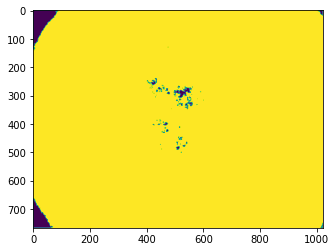

In [ ]:
plt.imshow(image4)
plt.show()

In [ ]:
aa = 100
print(image)
print(image>a)

[[255. 239. 255. ... 254. 240. 254.]
 [234.  42.   9. ...  77.  94. 235.]
 [255.   0.   0. ...  68.  76. 254.]
 ...
 [255.  25.   4. ...  84.  84. 254.]
 [229.  37.   0. ...  93. 108. 244.]
 [255. 240. 255. ... 244. 230. 254.]]
[[ True  True  True ...  True  True  True]
 [ True False False ... False False  True]
 [ True False False ... False False  True]
 ...
 [ True False False ... False False  True]
 [ True False False ... False  True  True]
 [ True  True  True ...  True  True  True]]


We see that the returned object is a logical matrix (containg True and False) of the same size as the image. That returned object can be directly assigned to a variable, leading to a very compact formulation:

In [ ]:
image_threshold = image > a

print (image_threshold)

[[ True  True  True ...  True  True  True]
 [ True False False ... False False  True]
 [ True False False ... False False  True]
 ...
 [ True False False ... False False  True]
 [ True False False ... False  True  True]
 [ True  True  True ...  True  True  True]]


Of course other logical operator can be used (<, >, ==, !=) and the resulting boolean matrices combined:

In [ ]:
a = 70
b = 100
image_threshold = (image>a)*(image<b)

print (image_threshold)

[[False False False ... False False False]
 [False False False ...  True  True False]
 [False False False ... False  True False]
 ...
 [False False False ...  True  True False]
 [False False False ...  True False False]
 [False False False ... False False False]]


## 8.2.4 Functional operations

Numpy has a large trove of functions to act on arrays. Just like the arithmetic operations described above, those functions are designed to be applied to entire arrays, and can either generate a new array or a single value. For example the mean, maximum and minmal pixel values can be abtained like this:

In [ ]:
help(np.mean)

Help on function mean in module numpy:

mean(a, axis=None, dtype=None, out=None, keepdims=<no value>)
    Compute the arithmetic mean along the specified axis.
    
    Returns the average of the array elements.  The average is taken over
    the flattened array by default, otherwise over the specified axis.
    `float64` intermediate and return values are used for integer inputs.
    
    Parameters
    ----------
    a : array_like
        Array containing numbers whose mean is desired. If `a` is not an
        array, a conversion is attempted.
    axis : None or int or tuple of ints, optional
        Axis or axes along which the means are computed. The default is to
        compute the mean of the flattened array.
    
        .. versionadded:: 1.7.0
    
        If this is a tuple of ints, a mean is performed over multiple axes,
        instead of a single axis or all the axes as before.
    dtype : data-type, optional
        Type to use in computing the mean.  For integer inputs,

In [ ]:
np.mean(image)

174.28380071286966

In [ ]:
np.mean(image, axis =0).shape

(1022,)

In [ ]:
image.shape

(767, 1022)

In [ ]:
np.min(image)

0.0

Alternatively one can take the square root of each array element by doing:

In [ ]:
np.sqrt(image)

array([[15.96871942, 15.45962483, 15.96871942, ..., 15.93737745,
        15.49193338, 15.93737745],
       [15.29705854,  6.4807407 ,  3.        , ...,  8.77496439,
         9.69535971, 15.32970972],
       [15.96871942,  0.        ,  0.        , ...,  8.24621125,
         8.71779789, 15.93737745],
       ...,
       [15.96871942,  5.        ,  2.        , ...,  9.16515139,
         9.16515139, 15.93737745],
       [15.13274595,  6.08276253,  0.        , ...,  9.64365076,
        10.39230485, 15.62049935],
       [15.96871942, 15.49193338, 15.96871942, ..., 15.62049935,
        15.16575089, 15.93737745]])

It is impossible to give an exhaustive presentation of Numpy functions. We will simply describe functions that we use a we go through course material.

## 8.3 Slicing and indexing

Let us now go back to our color image to explore how to select specific parts of an image.

In [ ]:
image = image_color

In [ ]:
image.shape

(767, 1022, 3)

We see that the image has three dimensions, probably it's a stack of three images of size 767x1022. Let us try to have a look at this image hoping that dimensions are handled gracefully:

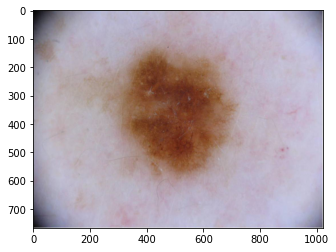

In [ ]:
plt.imshow(image)
plt.show()

The image being in natural colors, the three dimensions probably indicate an RGB (red, green, blue) format, and the plotting function just knows what to do in that case.

### 8.3.1 Array slicing

Let us now just look at one of the three planes composing the image. To do that, we are going the select a portion of the image array by slicing it. One can give:
- a single index e.g. 0 for the first element
- a range e.g. 0:10 for the first 10 elements
- take all elements using a semi-column :

What portion is selected has to be specified for each dimensions of an array. In our particular case, we want to select all rows, all columns and a single plane of the image:

In [ ]:
image.shape

(767, 1022, 3)

In [ ]:
image[:,:,1].shape

(767, 1022)

In [ ]:
image[:,0,0]

array([255, 234, 255, 253, 255, 255, 254, 255, 254, 254, 255, 255, 255,
       255, 255, 255, 250, 251, 253, 255, 255, 255, 255, 255, 253, 253,
       254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 252, 254, 255, 255, 255, 255, 255, 255, 254, 254, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254,
       254, 254, 254, 254, 254, 254, 254, 253, 253, 254, 254, 254, 253,
       251, 250, 252, 252, 253, 254, 255, 255, 255, 255, 249, 251, 253,
       253, 252, 253, 254, 255, 254, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 253, 252, 253, 253, 251, 251, 251, 252, 252, 252, 252,
       253, 254, 254, 255, 255, 255, 252, 253, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254,
       254, 254, 254, 254, 254, 255, 255, 255, 255, 255, 255, 255, 253,
       254, 254, 254, 255, 255, 255, 255, 253, 253, 255, 255, 25

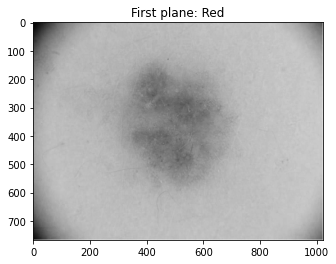

In [ ]:
plt.imshow(image[:,:,0],cmap='gray')
plt.title('First plane: Red')
plt.show()

We see now the red layer of the image. We can do the same for the others by specifying planes 0, 1, and 2:

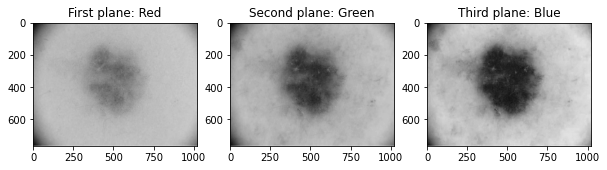

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(image[:,:,0],cmap='gray')
plt.title('First plane: Red')
plt.subplot(1,3,2)
plt.imshow(image[:,:,1],cmap='gray')
plt.title('Second plane: Green')
plt.subplot(1,3,3)
plt.imshow(image[:,:,2],cmap='gray')
plt.title('Third plane: Blue')
plt.show()

Logically intensities are different. We can confirm that by measuring the mean of each plane. To do that we use the same function as above but apply it to a singel sliced plane:

In [ ]:
image4 = image[:,:,0]

In [ ]:
np.mean(image4)

174.28380071286966

and for all planes using a comprehension list:

In [ ]:
np.mean(image[:,:,0])

174.28380071286966

In [ ]:
a = np.zeros((3,4,2,8,4,5))

In [ ]:
a.shape

(3, 4, 2, 8, 4, 5)

In [ ]:
[np.mean(image[:,:,i]) for i in range(3)]

[174.28380071286966, 157.79536889857297, 165.5814454874125]

To look at some more details let us focus on a smaller portion of the image e.g. one of the lesion core. For that we are going to take a slice of the red image and store it in a new variable and display the selection. We consider pixel rows from 200 to 600 and columns from 300 to 700 of the first plane (0).

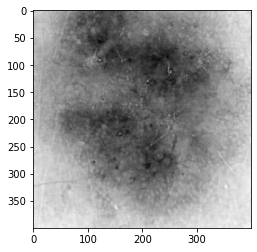

In [ ]:
image_red = image[200:600,300:700,0]
plt.imshow(image_red,cmap='gray')
plt.show()

There are different ways to select parts of an array. For example one can select every n'th element by giving a step size. In the case of an image, this subsamples the data:

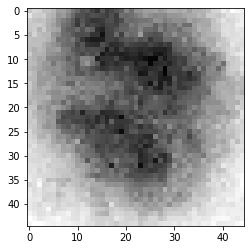

In [ ]:
image_subsample = image[200:600:9,300:700:9,0]
plt.imshow(image_subsample,cmap='gray')
plt.show()

Or use negative indices or steps to start from the end of the array. In our case this flips dimensions:

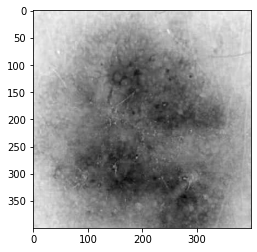

In [ ]:
image_reverse = image[600:200:-1,700:300:-1,0]
plt.imshow(image_reverse,cmap='gray')
plt.show()

### 8.3.2 Array indexing

In addition to slicing an array, we can also select specific values out of it. There are [many](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html) different ways to achieve that, but we focus here on two main ones.

First one might have a list of pixel positions and one wishes to get the values of those pixels. By passing two lists of the same size containing the rows and columns positions of those pixels, one can recover them:

In [ ]:
image_red[0:5,0:5]

array([[168, 169, 170, 171, 177],
       [168, 168, 170, 171, 176],
       [168, 168, 169, 170, 174],
       [168, 169, 169, 169, 173],
       [169, 170, 170, 170, 170]], dtype=uint8)

In [ ]:
image_red.shape

(400, 400)

In [ ]:
row_position = [0,1,2,3]
col_position = [0,1,0,1]

print(image_red[0:5,0:5])

image_red[row_position,col_position]

[[168 169 170 171 177]
 [168 168 170 171 176]
 [168 168 169 170 174]
 [168 169 169 169 173]
 [169 170 170 170 170]]


array([168, 168, 168, 169], dtype=uint8)

Alternatively, one can pass a logical array of the same dimensions as the original array, and only the True pixels are selected. For example, let us create a logical array by picking values above a threshold:

In [ ]:
threshold_image = image_red>120

Let's visualize it. Matplotlib handles logical arrays simply as a binary image:

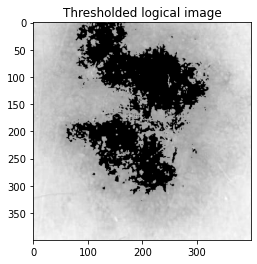

In [ ]:
plt.imshow(threshold_image*image_red,cmap = 'gray')
plt.title('Thresholded logical image')
plt.show()

In [ ]:
np.where(threshold_image)

(array([  0,   0,   0, ..., 399, 399, 399]),
 array([  0,   1,   2, ..., 397, 398, 399]))

We can recover the value of all the "white" (True) pixels in the original image by using:

In [ ]:
threshold_image.shape

(400, 400)

In [ ]:
image_red[threshold_image]

array([168, 169, 170, ..., 190, 190, 190], dtype=uint8)

In [ ]:
selected_pixels = image_red[threshold_image]
print(selected_pixels)

[168 169 170 ... 190 190 190]


And now ask how many pixels are above threshold and what their average value is.

In [ ]:
len(selected_pixels)

127590

In [ ]:
np.mean(selected_pixels)

152.17708284348302

We now know that there are 2585 pixels above the threshold and that their mean is 153.6

## 8.4 Creating arrays

Often we are going to create new arrays that we are going to then transform. There are a few common ways of doing that.

Creating a zero array of dimensions 3x5:

In [ ]:
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

Same for an array filled with ones:

In [ ]:
np.ones((3,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

Create an array filled with random uniform (0-1) values:

In [ ]:
np.random.rand(3,5)

array([[0.14336496, 0.93112412, 0.01020803, 0.47453451, 0.73191443],
       [0.56543727, 0.65861639, 0.55418121, 0.61651186, 0.07131102],
       [0.07829765, 0.64114895, 0.1961816 , 0.16652687, 0.13440248]])

Clearly we did something wrong. The argument that was passed was not accepted by the functions. This is a good occasion to look at the help for a more complex function, in order to know how to pass arguments.

In [ ]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should all be positive.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Notes
    -----
    This is a convenience function. If you want an interface that
    takes a shape-tuple as the first argument, refer to
    np.random.random_sample .
    
    Examples
    --------
    >>> np.random.rand(3,2)
    array([[ 0.14022471,  0.96360618],  #random
           [ 0.37601032,  0.25528411],  #random
           [ 0.49313049,  0.94909878]]

So we understand now that we can just pass a list of numbers:

In [ ]:
np.zeros((3,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
np.random.rand(3,5)

array([[0.28378142, 0.24245689, 0.2869616 , 0.17159674, 0.9123525 ],
       [0.30305021, 0.59514196, 0.82757197, 0.87694337, 0.99336018],
       [0.83896718, 0.33995374, 0.56995493, 0.44386342, 0.07923249]])

## 8.5 Assembling arrays

It might happen that we have separate images that need to be assembled into one larger matrix. Numpy provides several functions to achieve that. For example we can concatenate images, which means that we append an image to another. Let's grab each channel of the image:

In [ ]:
image_red = image[:,:,0]
image_green = image[:,:,1]
image_blue = image[:,:,2]

And concateante them:

In [ ]:
concatenated_image = np.concatenate((image_red,image_green))

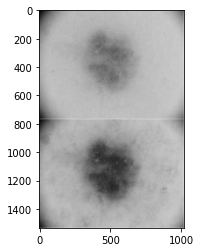

In [ ]:
plt.imshow(concatenated_image,cmap = 'gray')
plt.show()

We can specify along which axis they should be assembled:

In [ ]:
concatenated_image = np.concatenate((image_red,image_green),axis = 1)

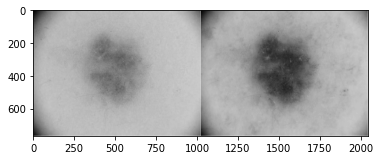

In [ ]:
plt.imshow(concatenated_image,cmap = 'gray')
plt.show()

Alternatively, we might want to create a stack of image from separate images. Let's recreate the cat image by switching the red and blue channel. We assemble the separate color images and specific that they should be stacked along the third axis (axis =2).

In [ ]:
switch_image = np.stack((image_blue,image_green,image_red),axis = 2)

We verify that the dimensions are the expected ones:

In [ ]:
switch_image.shape

(767, 1022, 3)

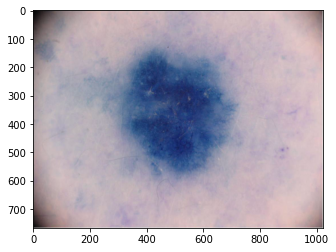

In [ ]:
plt.imshow(switch_image)
plt.show()